In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

<h2>Task 1</h2>

Let

$\, \text{D} = \text{"A person is infected"} \,$ \
$\, \text{+} = \text{"A positive test result"} \,$ \
$\, - = \text{"A negative test result"} \,$

$\, P(+|D) = 0.9 \,$ \
$\, P(+|D^c) = 0.1 \,$ \
$\, P(D) = 0.05 \,$

Given this information, we want to know how large the specificity need to be for the positive predictive value (PPV) to exceed 0.8.

**Sensitivity** (*true positive rate*):

- The probability of a positive test result, given that the person is truly positive (infected).
- It can be calculated as:
- $P(+|D).$

**Specificity** (*true negative rate*):

- The probability of a negative test result, given that the person is truly negative (not infected). 
- $P(- | D^c).$

**False positive rate** (FPR):

- The probability that the model incorrectly classifies a person as positive (infected), given that the person is negative (not infected).
- $P(+|D^c).$
- $\text{FPR} = P(+|D^c) = 1 - \text{specificity}.$

**PPV** (*precision*)

- The proportion of individuals who truly are infected (*true positives*) among all of the individuals who got diagnosed as infected (positive) by the test (model).
- In other words, it answers the following question:
    - Given that a model (test) has classificied an individual as positive, what is the probability that they actually are positive (infected)?
- $P(D|+).$

In [8]:
def ppv(spes, sens=0.9, prev=0.05):
    return (sens * prev) / (sens * prev + (1 - spes) * (1 - prev))

In [28]:
def visualize():
    x = np.linspace(0, 1, 1000)
    ppv_vals = [ppv(spes=i) for i in x]
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(x, ppv_vals, zorder=2)
    ax.grid(True, alpha=0.3, zorder=1)
    ax.set_xlabel('Specificity', size=12)
    ax.set_ylabel('PPV', size=12)

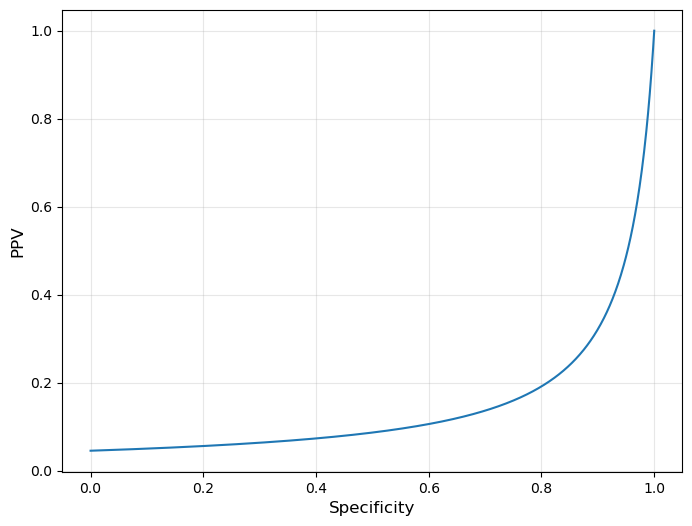

In [29]:
visualize()

In [74]:
1 - (0.9 * 0.05) / (0.8 * 0.95) + ((0.9 * 0.05) / 0.95)

0.9881578947368421

- Specificity needs to be greater than this for the PPV to exceed $\, 0.8. \,$

In [72]:
ppv(spes=0.988157894736842)

0.7999999999999988

In [73]:
ppv(spes=0.9881578947368421)

0.8000000000000003

<h2>Task 2</h2>

Likelihood ratio:

\begin{equation*}
    \large\Lambda(\theta) = \frac{L(\theta)}{L(\hat{\theta})} \quad (\le 1)
\end{equation*}

A likelihood interval is the interval of $\, \theta \,$ values for which

\begin{equation*}
    \large\Lambda(\theta) \ge \Lambda_{\text{crit}}
\end{equation*}

In [2]:
theta_hat = 2/3
theta_vals = np.linspace(0.0, 1.0, 1000)
lam_crit = 0.2585

In [3]:
def L(theta, log=False):
    likelihood = (theta / (theta + 1))**4 * (1 / (theta + 1))**6
    if log:
        return np.log(likelihood)
    return likelihood

In [4]:
L_ratios = np.array([L(theta=i) / L(theta=theta_hat) for i in theta_vals])

In [62]:
mask = L_ratios > lam_crit
ind = np.where(mask)[0]

In [74]:
((L(theta_vals[ind]) / L(theta_hat)) > lam_crit).all()

np.True_

In [156]:
def plot_L_interval(L__ratios, theta_vals, lam_crit):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(theta_vals, L_ratios)
    ax.grid(True, alpha=0.3, zorder=1)
    ax.axhline(y=lam_crit, color='k', linewidth=0.8)
    ax.vlines(x=theta_vals[ind][0], ymin=0, ymax=lam_crit, color='k', linewidth=0.8)
    ax.vlines(x=theta_vals[ind][-1], ymin=0, ymax=lam_crit, color='k', linewidth=0.8)
    ax.set_xlabel('Theta')
    ax.set_ylabel('Likelihood ratio')
    ax.text(x=0.35, y=0.1, s=f'90% likelihood interval: [{theta_vals[ind][0]:.3f}, {theta_vals[ind][-1]}]')

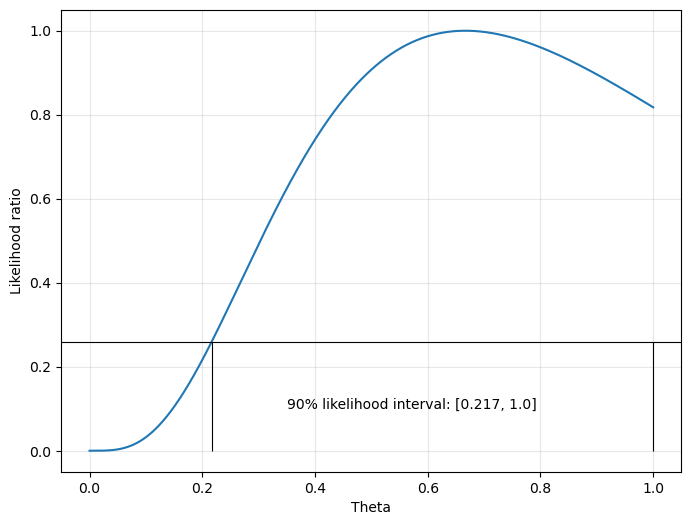

In [157]:
plot_L_interval(L_ratios, theta_vals, lam_crit)

<h2>Task 4</h2>

In [2]:
def risk_ratio(p1, p0):
    return p1 / p0

In [3]:
def risk_diff(p1, p0):
    return p1 - p0

In [4]:
def solve_p1(p0, rhs=2):
    p1 = symbols('p1')
    equation = Eq((p1 / (1 - p1)) / (p0 / (1 - p0)), rhs)
    solution = solve(equation, p1)
    return solution

In [28]:
def f(n):
    p0 = np.linspace(0.01, 0.99, n)
    risk_ratios = np.zeros(n)
    risk_diffs = np.zeros(n)
    for i in range(n):
        p1 = np.float64(solve_p1(p0=p0[i])[0])
        risk_ratios[i] = risk_ratio(p1=p1, p0=p0[i])
        risk_diffs[i] = risk_diff(p1=p1, p0=p0[i])
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    ax[0].plot(p0, risk_ratios, zorder=1)
    ax[0].grid(True, alpha=0.3, zorder=2)
    ax[0].set_xlabel('p0')
    ax[0].set_ylabel('Risk ratio')
    ax[1].plot(p0, risk_diffs, zorder=1)
    ax[1].grid(True, alpha=0.3, zorder=2)
    ax[1].set_xlabel('p0')
    ax[1].set_ylabel('Risk difference')
    plt.tight_layout();

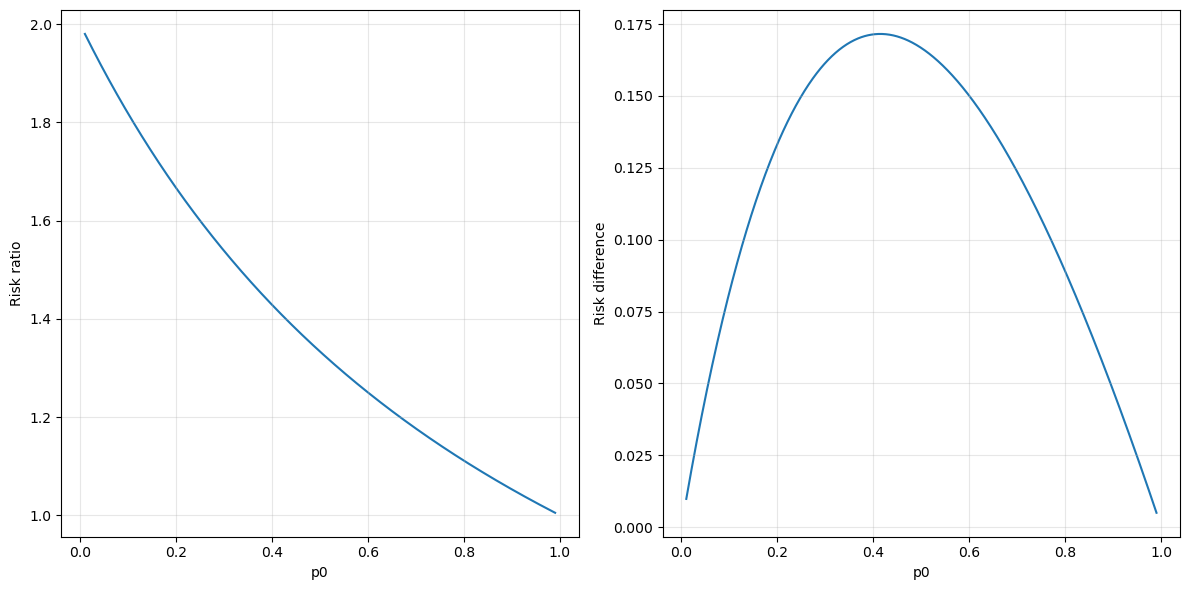

In [29]:
f(n=1000)

In [41]:
# p0 = 0.1
print(risk_ratio(p1=np.float64(solve_p1(p0=0.1)[0]), p0=0.1).item())
print(risk_diff(p1=np.float64(solve_p1(p0=0.1)[0]), p0=0.1).item())

1.8181818181818181
0.08181818181818182


In [42]:
# p0 = 0.6
print(risk_ratio(p1=np.float64(solve_p1(p0=0.6)[0]), p0=0.6).item())
print(risk_diff(p1=np.float64(solve_p1(p0=0.6)[0]), p0=0.6).item())

1.25
0.15000000000000002
